# Proyecto: Clasificación de flores mediante K-means (considerando 4 variables)

In [1]:

# Importamos el modelo de K-Means:
from sklearn.cluster import KMeans

from sklearn import datasets 

from sklearn import metrics

# Iimportamos metrica de 'Matriz de confusión' para evaluar el aprendizaje:
#from sklearn.metrics import confusion_matrix

import pandas as pd 

import matplotlib.pyplot as plt 


In [2]:
# Cargamos datos:
data_iris = datasets.load_iris()

In [3]:
# Extraemos caracteristicas (variables):
X_features = data_iris.data

# Extraemos las etiquetas reales:
Y_labels = data_iris.target
Y_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# Pasamos la información a un 'DataFrame' de pandas:
x_train = pd.DataFrame(X_features , columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width' ])
x_train.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


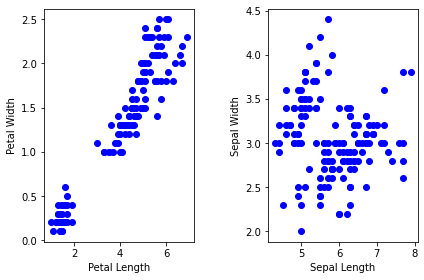

In [6]:
# visualizamos la relación de los pétalos y sépalos:

plt.figure()
ax1 = plt.subplot(1,2,1)
ax1.scatter(x_train.Petal_Length , x_train.Petal_Width, c='blue' )
ax1.set_xlabel('Petal Length', fontsize=10)
ax1.set_ylabel('Petal Width', fontsize=10)

ax2 = plt.subplot(1,2,2)
ax2.scatter(x_train.Sepal_Length , x_train.Sepal_Width, c='blue' )
ax2.set_xlabel('Sepal Length', fontsize=10)
ax2.set_ylabel('Sepal Width', fontsize=10)

plt.tight_layout() # <-- agrega espacio horizontal entre figuras
plt.subplots_adjust(wspace=0.5) # <-- espacio vertical entre figuras
plt.show()

In [7]:
# cargamos el modelo de K-Means:
K=3
model_kmeans = KMeans(n_clusters=K , max_iter=1000)

# Entrenamos el modelo con los datos de entrenamiento
model_kmeans.fit(x_train)

# generamos labels:
#y_labels = model_kmeans.labels_

KMeans(max_iter=1000, n_clusters=3)

In [8]:
# Predecimos etiquetas con el modelo entrenado:
y_kmeans = model_kmeans.predict(x_train)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [9]:
# Calculamos la precisión de la clasificación:
accuracy = metrics.adjusted_rand_score(Y_labels , y_kmeans)
accuracy
# Obs: hemos visto que si K < 3 o K > 3, el 'accuracy' es pequeño! 

0.7302382722834697

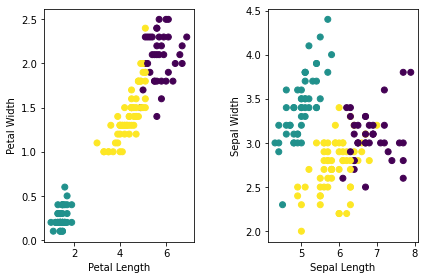

In [10]:
plt.figure()
ax1 = plt.subplot(1,2,1)
ax1.scatter(x_train.Petal_Length , x_train.Petal_Width, c=y_kmeans )
ax1.set_xlabel('Petal Length', fontsize=10)
ax1.set_ylabel('Petal Width', fontsize=10)

ax2 = plt.subplot(1,2,2)
ax2.scatter(x_train.Sepal_Length , x_train.Sepal_Width, c=y_kmeans )
ax2.set_xlabel('Sepal Length', fontsize=10)
ax2.set_ylabel('Sepal Width', fontsize=10)

plt.tight_layout() # <-- agrega espacio horizontal entre figuras
plt.subplots_adjust(wspace=0.5) # <-- espacio vertical entre figuras
plt.show()